In [36]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xarray 
import matplotlib.patches as mpatches
import os


In [37]:
#Accessing all the nc files
path=[]

months=["03","04","05"]

#Storing the paths in a array
for i in range(1901,2023):
    for j in months:
        path.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\ERSST version 3B\ersst.v5.{i}{j}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
all_data=[]
for i in path:
    temp = xarray.open_dataset(i)
    all_data.append(temp)



In [38]:
all_data[0]['sst'][0][0]

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
[16020 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
    lev      float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     object 1901-03-01 00:00:00
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  sea_surface_temperature
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0

In [39]:
len(all_data)

366

In [40]:
all_data[365]['sst'].shape

(1, 1, 89, 180)

In [41]:
def PlotMap(data,year=None):
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(16,8))
    
    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = 33  # Minimum value for the color scale
    vmax = -3.0 # Maximum value for the color scale
    
    regions = {
        'South Atlantic' : [[5//2,40//2],[-60//2+45,-45//2+45]],
        'East Australian' : [[160//2,190//2],[-40//2+45,-15//2+45]],
        'Mid Atlantic' : [[310//2,345//2],[-5//2+45,25//2+45]]
    
      }
    
    colors = ['red', 'blue', 'green']
    
    i=0
    for name, coords in regions.items():
        x1, x2 = coords[0]
        y1, y2 = coords[1]
        rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor=colors[i],facecolor='None')
        ax.add_patch(rect)
        i+=1
        
           
    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Temperature')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'World Map {year}')
    
    #plt.savefig(f'Cluster {cluster}.png', dpi=100, bbox_inches='tight')


In [42]:
def getRegionalData(data):
    regions = {
    'South Atlantic' : [[5//2,40//2],[-60//2+45,-45//2+45]],
    'East Australian' : [[160//2,190//2],[-40//2+45,-15//2+45]],
    'Mid Atlantic' : [[310//2,345//2],[-5//2+45,25//2+45]]
    }

    masked_data = []

    for j in range(15):
        masked_data.append(np.full_like(data, fill_value=None))

    i=0
    for name, coords in regions.items():
        x1, x2 = coords[0]
        y1, y2 = coords[1]
        masked_data[i][y1:y2, x1:x2] = data[y1:y2, x1:x2]
        masked_data[i]=xarray.DataArray(masked_data[i],dims=('lat', 'lon'))
        i+=1
    
    return masked_data
    

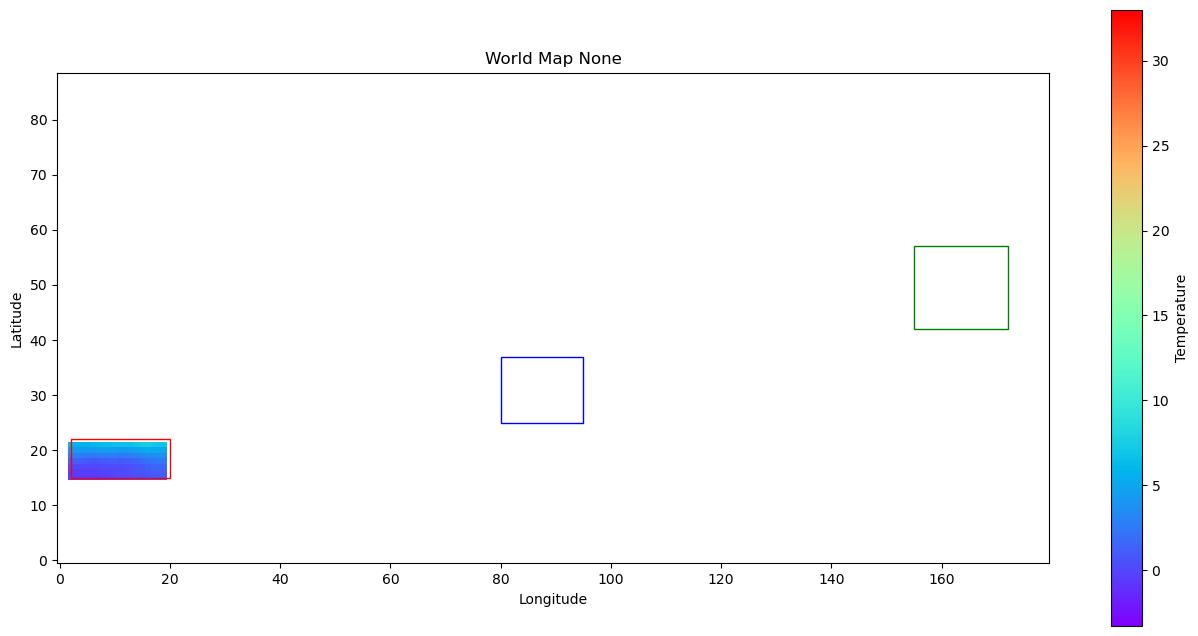

In [43]:
PlotMap(region13_monthly_sst_data[0])

In [44]:
region1_monthly_sst_data=[]
region2_monthly_sst_data=[]
region3_monthly_sst_data=[]

for i in range(len(all_data)):
    all_regional_data=getRegionalData(all_data[i]['sst'][0][0])
    region1_monthly_sst_data.append(all_regional_data[0])
    region2_monthly_sst_data.append(all_regional_data[1])
    region3_monthly_sst_data.append(all_regional_data[2])




In [45]:
region1_yearly_sst_data=[]
region2_yearly_sst_data=[]
region3_yearly_sst_data=[]


for i in range(0,len(all_data),3):
    
    monthly_to_yearly_combined_region1 = xarray.concat(region1_monthly_sst_data[i:i+3], dim='years')
    monthly_to_yearly_combined_region2 = xarray.concat(region2_monthly_sst_data[i:i+3], dim='years')
    monthly_to_yearly_combined_region3 = xarray.concat(region3_monthly_sst_data[i:i+3], dim='years')
   
    region1_yearly_sst_data.append(monthly_to_yearly_combined_region1.mean(dim='years'))
    region2_yearly_sst_data.append(monthly_to_yearly_combined_region2.mean(dim='years'))
    region3_yearly_sst_data.append(monthly_to_yearly_combined_region3.mean(dim='years'))
 

In [46]:
yearly_combined_region1=xarray.concat(region1_yearly_sst_data[0:110],dim='years')
yearly_combined_region2=xarray.concat(region2_yearly_sst_data[0:110],dim='years')
yearly_combined_region3=xarray.concat(region3_yearly_sst_data[0:110],dim='years')


region1_mean=yearly_combined_region1.mean(dim='years')
region2_mean=yearly_combined_region2.mean(dim='years')
region3_mean=yearly_combined_region3.mean(dim='years')


In [47]:
region1_yearly_ssta_data=[]
region2_yearly_ssta_data=[]
region3_yearly_ssta_data=[]

for i in range(len(region1_yearly_sst_data)):
    region1_yearly_ssta_data.append(region1_yearly_sst_data[i]-region1_mean)
    region2_yearly_ssta_data.append(region2_yearly_sst_data[i]-region2_mean)
    region3_yearly_ssta_data.append(region3_yearly_sst_data[i]-region3_mean)


In [48]:
year=1901
for i in range(len(region1_yearly_ssta_data)):
    
    region1_yearly_ssta_data[i].to_netcdf(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 13\ssta_{year}.nc")
    region2_yearly_ssta_data[i].to_netcdf(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 14\ssta_{year}.nc")
    region3_yearly_ssta_data[i].to_netcdf(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\Region 15\ssta_{year}.nc")

    year+=1

print(year)

2023


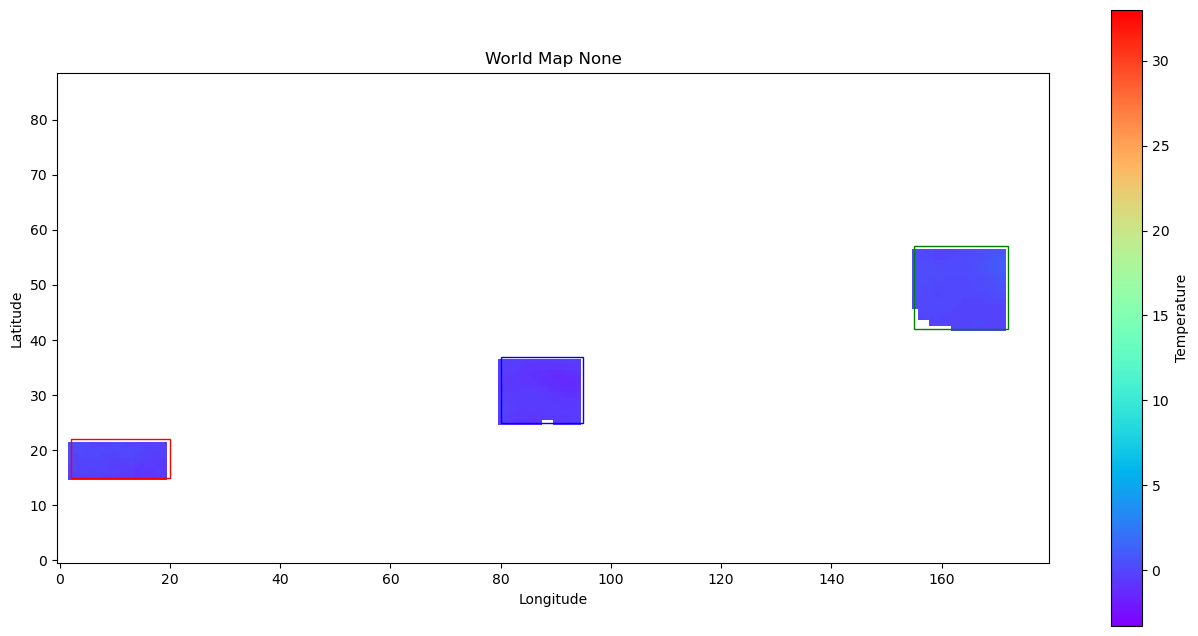

In [51]:
PlotMap(region1_yearly_ssta_data[20].combine_first(region2_yearly_ssta_data[20].combine_first(region3_yearly_ssta_data[0])))

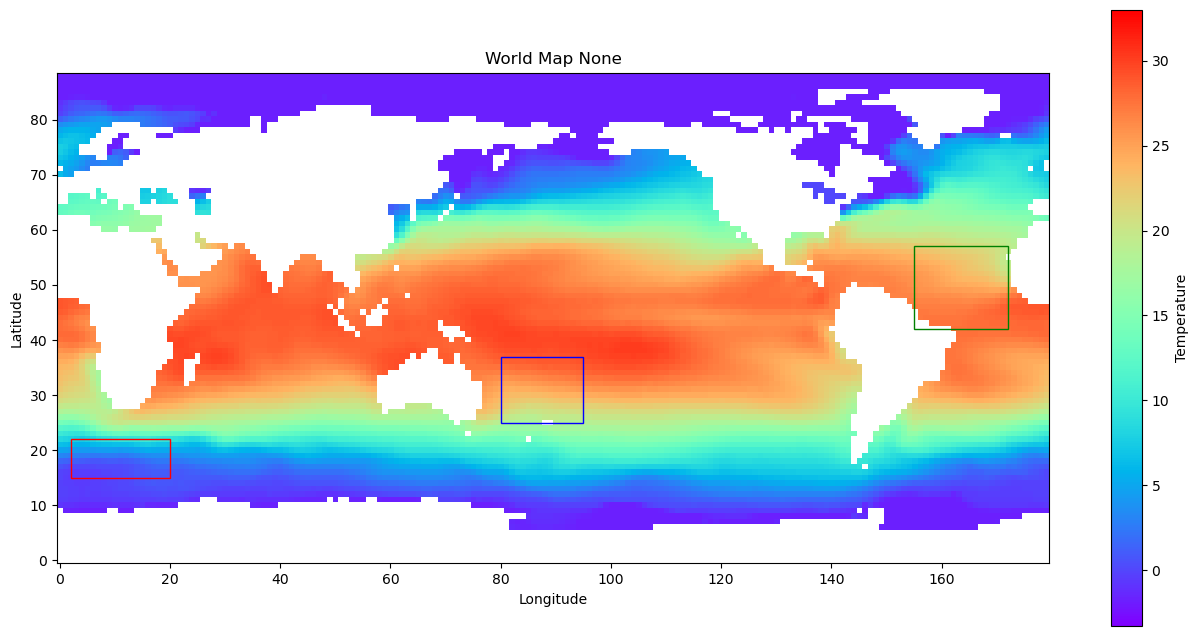

In [50]:
PlotMap(all_data[0]['sst'][0][0])